<a href="https://colab.research.google.com/github/ab-sa/Statistical-Machine-Learning-2/blob/main/Lecture3_multipleLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import some libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

Import Credit data

In [ ]:
Credit = pd.read_csv('Credit.csv')

Fit a multiple linear regression model (2 features)

In [ ]:
X = Credit[['Income', 'Education']]
y = Credit['Balance']
reg_2f = LinearRegression().fit(X, y)

Visualizing the fitted model - 3D plot

In [ ]:
print(X.min())
print(X.max())

Income       10.354
Education     5.000
dtype: float64
Income       186.634
Education     20.000
dtype: float64


In [ ]:
x1 = np.linspace(10, 190, 500)
x2 = np.linspace(5, 20, 100)

Income, Education = np.meshgrid(x1, x2)
X_3d = np.array([Income.flatten(), Education.flatten()]).T
X_3d

array([[ 10.        ,   5.        ],
       [ 10.36072144,   5.        ],
       [ 10.72144289,   5.        ],
       ...,
       [189.27855711,  20.        ],
       [189.63927856,  20.        ],
       [190.        ,  20.        ]])

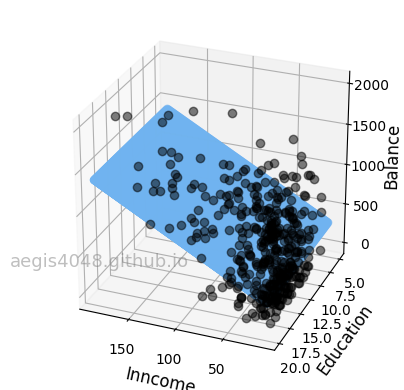

In [ ]:
preds_3d = reg_2f.predict(X_3d)

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax = fig.add_subplot(131, projection='3d')

ax.plot(X['Income'], X['Education'], y, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax.scatter(Income.flatten(), Education.flatten(), preds_3d, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
ax.set_xlabel('Inncome', fontsize=12)
ax.set_ylabel('Education', fontsize=12)
ax.set_zlabel('Balance', fontsize=12)
ax.locator_params(nbins=4, axis='x')
ax.locator_params(nbins=5, axis='x')

ax.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax.transAxes, color='grey', alpha=0.5)

ax.view_init(elev=27, azim=112)

fig.tight_layout()

Fit a multiple linear regression model: more features

In [ ]:
features = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']
target = 'Balance'

X = Credit[features].values.reshape(-1, len(features))
y = Credit[target].values

reg = LinearRegression()
model = reg.fit(X, y)

print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in reg.coef_])
print('R-squared               :  %.2f' % reg.score(X, y))
print('Y-intercept             :  %.2f' % reg.intercept_)

Features                :  ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']
Regression Coefficients :  [-7.56, 0.13, 2.06, 11.59, -0.89, 2.0]
R-squared               :  0.88
Y-intercept             :  -477.96


Multicolinearity: Heatmap plot

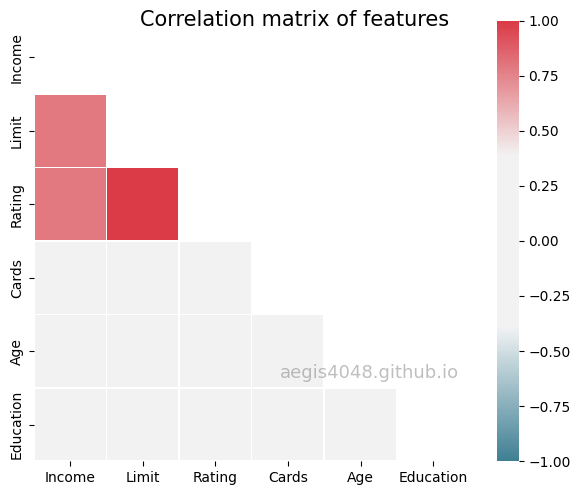

In [ ]:
corr = Credit[features].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

fig.suptitle('Correlation matrix of features', fontsize=15)
ax.text(0.77, 0.2, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)

fig.tight_layout()

Collinearity: impacts

In [ ]:
features = ['Limit', 'Rating', 'Income', 'Cards', 'Age', 'Education']
target = 'Balance'

X = Credit[features].values.reshape(-1, len(features))
y = Credit[target].values

reg = LinearRegression()
model = reg.fit(X, y)

print('Model 1: all Rating, Limit, and Income are in:')
print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in reg.coef_])
print('R-squared               :  %.2f' % reg.score(X, y))
print('Y-intercept             :  %.2f' % reg.intercept_)
print(' ')

features = ['Limit', 'Rating', 'Cards', 'Age', 'Education']
target = 'Balance'

X = Credit[features].values.reshape(-1, len(features))
y = Credit[target].values

reg = LinearRegression()
model = reg.fit(X, y)

print('Model 2: only Limit and Rating are in:')
print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in reg.coef_])
print('R-squared               :  %.2f' % reg.score(X, y))
print('Y-intercept             :  %.2f' % reg.intercept_)
print(' ')

features = ['Limit', 'Cards', 'Age', 'Education']
target = 'Balance'

X = Credit[features].values.reshape(-1, len(features))
y = Credit[target].values

reg = LinearRegression()
model = reg.fit(X, y)

print('Model 3: only Limit is in:')
print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in reg.coef_])
print('R-squared               :  %.2f' % reg.score(X, y))
print('Y-intercept             :  %.2f' % reg.intercept_)

Model 1: all Rating, Limit, and Income are in:
Features                :  ['Limit', 'Rating', 'Income', 'Cards', 'Age', 'Education']
Regression Coefficients :  [0.13, 2.06, -7.56, 11.59, -0.89, 2.0]
R-squared               :  0.88
Y-intercept             :  -477.96
 
Model 2: only Limit and Rating are in:
Features                :  ['Limit', 'Rating', 'Cards', 'Age', 'Education']
Regression Coefficients :  [0.11, 0.97, 22.9, -2.39, 2.71]
R-squared               :  0.76
Y-intercept             :  -309.30
 
Model 3: only Limit is in:
Features                :  ['Limit', 'Cards', 'Age', 'Education']
Regression Coefficients :  [0.17, 27.58, -2.39, 2.49]
R-squared               :  0.76
Y-intercept             :  -283.14
